In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('results.csv')
data.head()


In [4]:
data.shape


(531, 4)

In [5]:
data.dropna(inplace=True)
data.shape

(282, 4)

In [7]:
#creare a new column and make it 0  for every riw
data['Time'] = 0
    

In [19]:
#to iterate through every length of the route and make length of 4 for every route
data['route'] = data['route'].apply(lambda x: x[:4])
data = data[~data['route'].str.contains('-')]



In [20]:
data.head()

,url,route,x,y,Time
1,43b9c82c-e0a7-4fbd-8ad6-a54c71d1ce26,D3D2,0.41519442,3.082648,15
2,9871984a-4359-4046-922b-01fb3bee4dd0,D3D2,2.2702882,4.020018,14
4,5bed834c-be98-4db0-9ce5-e1321648f0cc,D3D2,5.9617763,3.340837,15
8,f7d39835-05f3-4fcb-b619-8629e1235386,D2D1,1.0271356,3.749104,8
9,6465bb27-1ccd-4bb1-962a-8bf0173c0651,D3D2,0.45751074,3.135275,15


In [21]:
data['route'].values

array(['D3D2', 'D3D2', 'D3D2', 'D2D1', 'D3D2', 'D1D2', 'D1D2', 'D2D1',
       'D2D2', 'D3D2', 'D2D2', 'D2D2', 'D2D2', 'D2D2', 'D2D1', 'D2D1',
       'D2D1', 'D2D2', 'D3D2', 'D2D1', 'D3D1', 'D2D1', 'D2D2', 'D2D1',
       'D2D2', 'D2D2', 'D1D2', 'D2D1', 'D2D2', 'D2D2', 'D3D3', 'D2D1',
       'D3D2', 'D2D3', 'D3D1', 'D2D1', 'D2D2', 'D3D2', 'D3D1', 'D3D1',
       'D2D2', 'D2D1', 'D1D2', 'D2D1', 'D2D1', 'D2D3', 'D3D2', 'D2D2',
       'D1D2', 'D2D2', 'D2D1', 'D2D1', 'D2D2', 'D2D1', 'D2D2', 'D3D2',
       'D1D2', 'D1D2', 'D2D2', 'D3D2', 'D3D2', 'D2D3', 'D2D1', 'D3D3',
       'D2D3', 'D2D1', 'D3D1', 'D2D2', 'D2D2', 'D3D3', 'D2D3', 'D2D3',
       'D2D1', 'D2D2', 'D2D1', 'D3D2', 'D2D1', 'D2D2', 'D2D1', 'D2D3',
       'D2D2', 'D1D2', 'D2D1', 'D2D2', 'D2D2', 'D2D2', 'D2D2', 'D3D1',
       'D2D3', 'D2D2', 'D2D2', 'D3D3', 'D2D1', 'D2D1', 'D2D2', 'D2D1',
       'D2D3', 'D3D2', 'D3D2', 'D3D2', 'D2D2', 'D2D3', 'D2D3', 'D3D2',
       'D2D2', 'D3D3', 'D3D2', 'D1D2', 'D3D3', 'D3D2', 'D2D1', 'D2D2',
      

In [22]:
#to get average time depending on the route 
data.groupby('route')['Time'].mean()

route
D1D1     1.000000
D1D2     8.000000
D2D1     7.800000
D2D2     1.000000
D2D3    15.257143
D3D1    10.950000
D3D2    15.000000
D3D3     1.000000
Name: Time, dtype: float64

In [23]:
data

,url,route,x,y,Time
1,43b9c82c-e0a7-4fbd-8ad6-a54c71d1ce26,D3D2,0.41519442,3.082648,15
2,9871984a-4359-4046-922b-01fb3bee4dd0,D3D2,2.2702882,4.020018,14
4,5bed834c-be98-4db0-9ce5-e1321648f0cc,D3D2,5.9617763,3.340837,15
8,f7d39835-05f3-4fcb-b619-8629e1235386,D2D1,1.0271356,3.749104,8
9,6465bb27-1ccd-4bb1-962a-8bf0173c0651,D3D2,0.45751074,3.135275,15
...,...,...,...,...,...
524,84fc9b44-4b30-497a-b96b-dafd5015f67a,D2D2,1.724892,9.393477,1
526,aeb70382-dbdc-4384-9d41-30b14a6e715f,D2D1,0.54376876,3.203155,8
527,f9a268ac-4e06-4e64-9290-625d7d42c4e1,D2D1,6.1831465,3.282909,8
528,100a1a39-ceb7-458d-b931-dbd5c6209a59,D3D3,0.6393661,3.276303,1


In [ ]:
#convert route to number using one hot encoding and train the data to predict the time using the route
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['route']]).toarray()
y = data['Time'].values

Mean Squared Error: 0.69857421875
R^2 Score: 0.9789586078689759


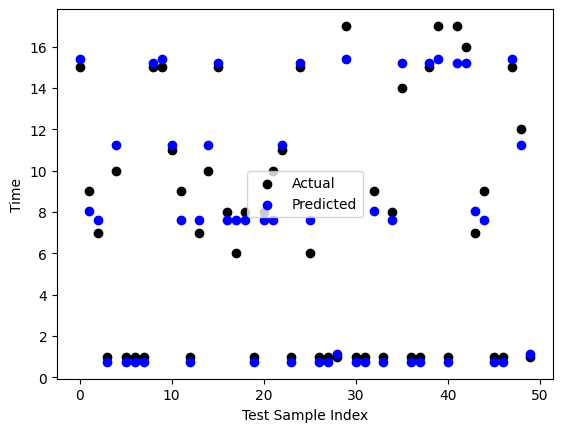

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# One-hot encode the route column
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['route']]).toarray()

y = data['Time'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Plot the results
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted')
plt.xlabel('Test Sample Index')
plt.ylabel('Time')
plt.legend()
plt.show()


Mean Squared Error: 0.699399573114407
R^2 Score: 0.9789337477977589
Mean Absolute Error: 0.5041606014051087


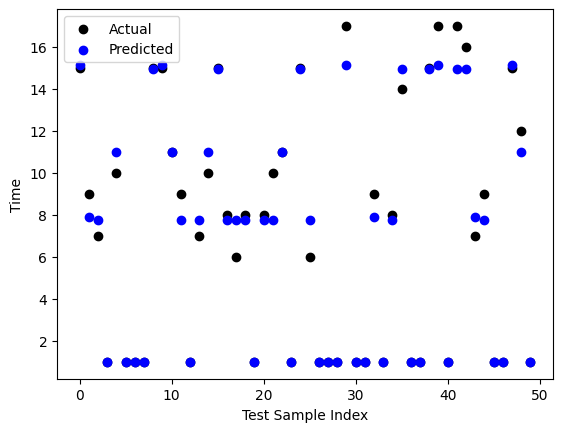

In [29]:
#use random forest to predict the time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
# Plot the results
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted')
plt.xlabel('Test Sample Index')
plt.ylabel('Time')
plt.legend()
plt.show()



Mean Squared Error: 0.6989823952020202
R^2 Score: 0.9789463133975295
Mean Absolute Error: 0.5048560606060606


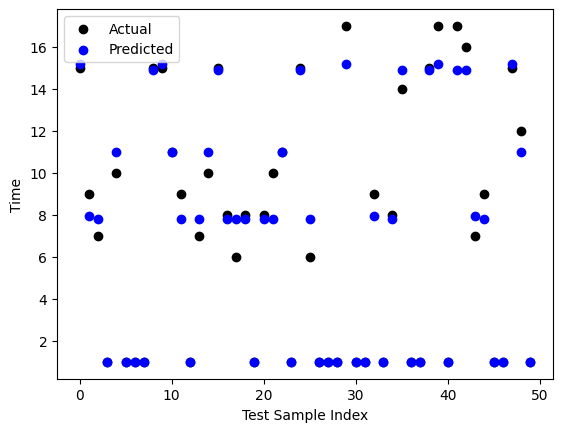

In [30]:
#use decision tree to predict the time
from sklearn.tree import DecisionTreeRegressor

# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
# Plot the results
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted')
plt.xlabel('Test Sample Index')
plt.ylabel('Time')
plt.legend()
plt.show()



In [ ]:
#convert the route to a number and train the data to predict the time using the route
"""
data['route'] = data['route'].apply(lambda x: int(x))
X = data[['route']].values
y = data['Time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()


In [ ]:
#Train the data to predict the time using the route
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X = encoder.fit_transform(data[['route']]).toarray()
y = data['Time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

#plot the data
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()


In [25]:
"""
def calculate_time(row):
    k = row['route']
    a = k[1]
    b = k[3]
    
    if a == b:
        return 1
    c=a+b
    

    ranges = {
        '1': (1, 4),
        '2': (5, 8),
        '3': (8, 11),
        '4': (11, 14),
        '5': (14, 17),
    }
   


    time_a = np.random.randint(*ranges.get(a, (1, 17)))
    

    time_b = np.random.randint(*ranges.get(b, (1, 17)))
    

   # time_c = np.random.randint(*ranges.get(c, (1, 17)))
    
    total_time = time_a + time_b 
    #+ time_c
    
    return total_time



data['Time'] = data.apply(calculate_time, axis=1)
"""


"\ndef calculate_time(row):\n    k = row['route']\n    a = k[1]\n    b = k[3]\n    \n    if a == b:\n        return 1\n    c=a+b\n    \n\n    ranges = {\n        '1': (1, 4),\n        '2': (5, 8),\n        '3': (8, 11),\n        '4': (11, 14),\n        '5': (14, 17),\n    }\n   \n\n\n    time_a = np.random.randint(*ranges.get(a, (1, 17)))\n    \n\n    time_b = np.random.randint(*ranges.get(b, (1, 17)))\n    \n\n   # time_c = np.random.randint(*ranges.get(c, (1, 17)))\n    \n    total_time = time_a + time_b \n    #+ time_c\n    \n    return total_time\n\n\n\ndata['Time'] = data.apply(calculate_time, axis=1)\n"